<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/110_intro_prob.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>


(intro_prob_notebook)=
# Introduzione al calcolo delle probabilità

In questo capitolo, esamineremo diverse concezioni della probabilità, tra cui la visione classica, frequentista e bayesiana. Approfondiremo anche argomenti come le variabili casuali, le funzioni di massa di probabilità e le funzioni di ripartizione. Inoltre, introdurremo la simulazione con Python per comprendere la legge dei grandi numeri, un concetto fondamentale nell'ambito della probabilità.

Prima di procedere, è indispensabile leggere l'appendice dedicata al {ref}`combinatorics-notebook`.

## Preparazione del Notebook

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import itertools as it
import math
import scipy.stats as stats
import arviz as az
import seaborn as sns

In [8]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

## Storia della probabilità

La probabilità è un modo formale di quantificare l'incertezza, assegnando plausibilità o credibilità a un insieme di possibilità mutuamente esclusive o risultati di un esperimento o osservazione. La storia della probabilità è lunga e complessa, come illustrato in varie opere (Tabak 2004, Stigler 1986, Weisberg 2014). L'origine della probabilità moderna risale a una domanda posta da Antoine Gombaud (Chevalier de Méré) a Blaise Pascal (1623–1652) su come dividere equamente le puntate di un gioco di carte interrotto. Il problema può essere così formulato (si veda la formulazione esatta su [Wikipedia](https://en.wikipedia.org/wiki/Problem_of_points)):

> Immaginiamo due persone che partecipano a un gioco a più round. In ogni round, entrambe le persone hanno la stessa probabilità di vincere. La prima persona che vince sei round consecutivi si aggiudicherà un ricchissimo premio in denaro. Ora, supponiamo che A e B abbiano già disputato sei round, con A che ha vinto cinque volte e B una volta. In quel momento, il gioco è stato interrotto a causa di un temporale. Poiché né A né B hanno raggiunto le sei vittorie, anziché assegnare il premio a uno di loro, hanno deciso di dividerlo. Ma qual è il modo più equo per farlo?

La discussione tra Pierre de Fermat (1607–1655) e Pascal ha portato alla formalizzazione dell'utilizzo della matematica per risolvere questo problema. In sostanza, una soluzione proposta consiste nel considerare le probabilità di vincita di ciascun giocatore. Ad esempio, se A ha una probabilità del 97% di vincere il premio alla fine e B ha una probabilità del 3%, allora sembrerebbe equo assegnare ad A il 97% del premio. L'interesse pubblico per la loro corrispondenza è sopravvissuto grazie al libro di Christian Huygens del 1657 "De Ratiociniis in Ludo Aleae" (Sul Ragionamento nei Giochi di Dadi), che è rimasto il riferimento per la probabilità per circa 50 anni.

Il libro postumo di Jacob Bernoulli, "L'Arte della Congettura" (1713), ha segnato una svolta nella storia della probabilità. Bernoulli ha definito la probabilità come un indice di incertezza compreso tra 0 e 1 e ha collegato il calcolo della probabilità ai dati e alla frequenza a lungo termine di un evento, noto come legge dei grandi numeri. Bernoulli ha applicato la probabilità anche a settori diversi dal gioco d'azzardo, come la mortalità umana e la giustizia penale, creando la cosiddetta "probabilità soggettiva".

### Collegamento tra Probabilità e Statistica

La storia della probabilità termina intorno agli anni '20 del Novecento, quando Ronald A. Fisher formulò un nuovo quadro teorico per l'inferenza statistica basata sulla frequenza. Fisher ha introdotto concetti come massima verosimiglianza, test di significatività, metodi di campionamento, analisi della varianza e design sperimentale. Il suo lavoro ha segnato una svolta fondamentale nella teoria e nei metodi statistici.

Negli anni '30, Jerzy Neyman e Egon Pearson hanno sviluppato una teoria della decisione statistica, basata sul principio della verosimiglianza e sull'interpretazione frequentista della probabilità. Hanno definito due tipi di errore decisionale e utilizzato il test di significatività di Fisher, interpretando i valori p come tassi di errore a lungo termine.

### La riscoperta dei metodi Monte Carlo Markov chain negli anni '80

Fisher ha sviluppato una visione critica della "probabilità inversa" (i metodi bayesiani), nonostante fosse stata la metodologia principale per l'inferenza statistica per quasi 150 anni. La sua visione frequentista ha avuto un forte impatto sullo sviluppo della statistica teorica e sperimentale, portando a un declino dell'inferenza basata sul metodo di probabilità inversa di Laplace.

Nel frattempo, il libro di Harold Jeffreys del 1939, "Theory of Probability", ha rappresentato la prima esposizione moderna dei metodi bayesiani, ma la rinascita del framework bayesiano ha dovuto attendere fino alla riscoperta dei metodi Monte Carlo Markov chain alla fine degli anni '80, che hanno reso possibili calcoli precedentemente irrealizzabili.

## Che cos'è la probabilità?

Esistono due punti di vista relativi al significato del concetto di probabilità.

- Secondo una prospettiva che possiamo chiamare "ontologica", la probabilità è considerata come una proprietà intrinseca del mondo, indipendente dalla nostra esperienza. In questa visione, la probabilità è vista come una caratteristica oggettiva del mondo stesso.
- D'altra parte, la prospettiva "epistemica" vede la probabilità come una misura della nostra conoscenza del mondo anziché una proprietà oggettiva. Questa visione soggettiva della probabilità dipende dalla nostra conoscenza e dal nostro punto di vista.

### Interpretazione classica

La prima definizione di probabilità è stata proposta da Pierre-Simon Laplace (1749-1827), che si è avvalso del calcolo combinatorio. Secondo Laplace, la probabilità $P$ di un evento è definita come il rapporto tra il numero di casi in cui l'evento si verifica e il numero totale di casi possibili. In questa definizione, un evento è qualcosa a cui è possibile assegnare un valore di verità, ovvero qualcosa che può essere vero o falso. Ad esempio, la probabilità di ottenere un 3 in un lancio di un singolo dado è 1/6 ≃ 0.17, poiché c'è un solo caso favorevole (il lancio ha prodotto un 3) su sei casi possibili (i numeri da 1 a 6). Tuttavia, questa definizione è insoddisfacente in quanto si basa sull'assunzione che ogni evento sia equiprobabile, il che non è sempre vero. Inoltre, questa definizione è circolare poiché per definire il concetto di probabilità, è necessario prima definire cosa significa che gli eventi siano equiprobabili, e quindi si deve già conoscere il concetto di probabilità.

### Interpretazione frequentista

Un secondo tentativo di definire la probabilità si basa sull'approccio frequentista, che può essere attribuito a molti autori. In questo approccio, la probabilità è definita sulla base delle frequenze osservate dell'occorrenza di un evento. Questo approccio nasce dalla difficoltà di assegnare una probabilità agli eventi assumendo il principio di equiprobabilità, come nel caso dei dadi o delle carte di un mazzo. Sebbene la probabilità di ottenere 3 come risultato del lancio di un dado sia 1/6 se crediamo che il dado sia bilanciato, se così non fosse non potremmo assegnare la stessa probabilità a tutti i risultati possibili. Tuttavia, possiamo stimare le probabilità come la frequenza $f_3$, definita come il rapporto tra il numero di volte in cui un lancio ha prodotto 3 e il numero totale di lanci.

Si osservi che l'osservazione della frequenza $f_3$ è solo un' approssimazione della probabilità, ma l'accuratezza migliora all'aumentare del numero totale di lanci, $N$. In linea di principio, la probabilità di ottenere 3, $P(3)$, è il limite della frequenza $f_3$ quando il numero totale di lanci $N$ tende all'infinito. Tuttavia, questa definizione richiede l'infinita ripetizione di un esperimento, il che può essere impraticabile o impossibile in molti casi. Inoltre, questa definizione assume che gli eventi futuri siano simili agli eventi passati, il che non è sempre garantito.

#### Problema del caso singolo

A causa dell'approccio frequentista, che fa riferimento alla frequenza relativa di eventi nel lungo periodo, non è concettualmente corretto parlare della probabilità di eventi che non sono ripetibili. Per esempio, sarebbe inappropriato discutere della probabilità che Alcarez sconfigga Djokovic nella finale di Wimbledon del 2023 o della probabilità che piova a Firenze nel giorno di Ferragosto del 2024, dato che si tratta di eventi specifici e irripetibili. Tuttavia, è frequente che persone non esperte nel campo utilizzino il termine 'probabilità'  per descrivere tali eventi.

### Interpretazione soggettivista

Una visione alternativa della probabilità la considera come una credenza soggettiva. {cite:t}`de2017theory` ha proposto un'interpretazione in cui la probabilità non è vista come una caratteristica oggettiva degli eventi, ma piuttosto come una misura della credenza soggettiva, suggerendo di trattare $p(·)$ come una probabilità soggettiva. È interessante notare che de Finetti era un soggettivista radicale. Infatti, la frase di apertura del suo trattato in due volumi sulla probabilità afferma che "La probabilità non esiste", intendendo che la probabilità non ha uno status oggettivo, ma rappresenta piuttosto la quantificazione della nostra esperienza di incertezza. Riteneva che l'idea di una probabilità esterna all'individuo, con uno status oggettivo, fosse pura superstizione, paragonabile al credere in "Etere cosmico, Spazio e Tempo assoluti, ..., o Fate e Streghe...". Secondo {cite:t}`de2017theory`, "... esistono solo probabilità soggettive - cioè, il grado di credenza nell'occorrenza di un evento attribuito da una determinata persona in un dato momento con un dato insieme di informazioni." 

Come sottolineato da {cite:t}`press2009subjective`, la prima menzione della probabilità come grado di credenza soggettiva fu fatta da {cite:t}`ramsey1926truth`, ed è questa nozione di probabilità come credenza soggettiva che ha portato a una notevole resistenza alle idee bayesiane. Una trattazione dettagliata degli assiomi della probabilità soggettiva si trova in {cite:t}`fishburn1986axioms`.

La denominazione "soggettivo" legata alla probabilità potrebbe risultare infelice, poiché potrebbe suggerire un ragionamento vago o non scientifico. {cite:t}`lindley2013understanding` condivide queste riserve, proponendo l'alternativa "probabilità personale" rispetto a "probabilità soggettiva". Analogamente, {cite:t}`howson2006scientific` preferiscono utilizzare l'espressione "probabilità epistemica", che riflette il grado di incertezza di un individuo di fronte al problema trattato. In sostanza, la probabilità epistemica si riferisce all'incertezza personale riguardo a variabili sconosciute. Questa terminologia viene adottata anche nel testo di {cite:t}`kaplan2023bayesian`, fornendo un linguaggio più neutro per discutere di questi concetti.

Va inoltre notato che l'interpretazione soggettiva si adatta bene a eventi singoli, permettendo di esprimere una convinzione su eventi specifici, come la probabilità di pioggia in un dato giorno o l'esito di una competizione sportiva.

```{admonition} Nota
Per chi desidera approfondire, un'introduzione molto leggibile alle tematiche della definizione della probabilità nella storia della scienza è fornita nel primo capitolo del testo *Bernoulli's fallacy* {cite:p}`clayton2021bernoulli`.
```

## Concetti di base 

Esaminiamo qui di seguito alcuni concetti di base della teoria delle probabilità.

### Esperimento casuale ed eventi 

Nella teoria delle probabilità, un esperimento casuale è un processo o una situazione in cui il risultato non può essere predetto con certezza prima dell'esecuzione dell'esperimento. Al fine di analizzare gli esperimenti casuali, sono fondamentali alcune nozioni chiave:

1. *Spazio campionario*: Lo spazio campionario è l'insieme di tutti i possibili risultati che possono verificarsi durante l'esperimento casuale. È comunemente indicato con il simbolo $\Omega$.

2. *Evento elementare*: Un evento elementare rappresenta un singolo risultato all'interno dello spazio campionario. Gli eventi elementari sono indivisibili e costituiscono i mattoni di base per gli altri eventi. Sono generalmente indicati con simboli come $E_1$, $E_2$, ecc.

3. *Evento*: Un evento è un sottoinsieme dello spazio campionario e rappresenta una collezione di eventi elementari. Può consistere in uno o più eventi elementari ed è spesso indicato con simboli come $A$, $B$, ecc.

Per esprimere il verificarsi di eventi congiunti (eventi "compatibili"), utilizziamo il connettivo logico "e" ($\land$) e la probabilità della loro intersezione è indicata come $P(A \cap B)$ o $P(A, B)$. Mentre per gli eventi disgiunti (eventi "incompatibili"), in cui i due eventi non possono verificarsi contemporaneamente, usiamo il connettivo logico "o" ($\lor$) e la probabilità della loro unione è $P(A \cup B) = 0$.

I valori di probabilità $P(A) = 0$ rappresentano eventi impossibili, mentre $P(A) = 1$ rappresentano eventi certi.

Per denotare la probabilità che un evento $A$ non si verifichi, possiamo usare la notazione $P(\lnot A)$ o $P(\bar{A})$, dove $P(\bar{A}) = 1 - P(A)$.

Ad esempio, consideriamo l'esperimento casuale del lancio di un dado. Gli eventi elementari sarebbero rappresentati dai singoli numeri {1}, {2}, {3}, ecc. Gli eventi, invece, possono essere insiemi di eventi elementari. Ad esempio, l'evento "ottenere un numero dispari" sarebbe rappresentato dall'insieme {1, 3, 5}, mentre l'evento "ottenere un numero maggiore di 4" sarebbe rappresentato dall'insieme {5, 6}. Se ci concentriamo sull'evento "dispari", il dado potrebbe cadere sul 3, 1 o 5, e tutti questi risultati verificherebbero l'evento "dispari".

### Variabili casuali

Ogni volta che lanciamo un dado, otteniamo un risultato specifico nel mondo reale, ma è anche possibile immaginare quali risultati alternativi sarebbero potuti accadere. Questo tipo di ragionamento, chiamato controfattuale, è fondamentale per comprendere la teoria delle probabilità e l'inferenza statistica.

Introduciamo ora il concetto di *variabile casuale*. Consideriamo la variabile $Y$, che rappresenta il risultato di uno specifico lancio di un dado in un dato momento, e notiamo che i suoi valori non possono essere predetti con certezza in anticipo. Per semplificare i calcoli e l'analisi, nella teoria della probabilità, le variabili casuali vengono generalmente rappresentate da valori numerici.

Un esempio è rappresentato da $Y = 1$, che indica l'evento in cui il lancio del dado produce il risultato "dispari". La probabilità di un evento, indicata con $P(Y)$, rappresenta la credibilità o la proporzione di volte in cui ci si aspetta che l'evento $Y$ si verifichi, considerando molte ripetizioni indipendenti dell'esperimento casuale a lungo termine. Ad esempio, per un dado equilibrato, la probabilità dell'evento "il risultato del lancio del dado è dispari" è scritta come $P(Y = 1) = 0.5$. Questo significa che ci si aspetta che il risultato "dispari" si verifichi con una probabilità del 50% nei lanci ripetuti di un dado equilibrato.

Un altro aspetto importante riguarda gli eventi *mutuamente esclusivi* ed *esaustivi*. Se lanciamo un dado equilibrato, allora la probabilità di ottenere "dispari" ($Y=1$) deve essere uguale alla probabilità di ottenere "pari" ($Y=0$), entrambe pari a $0.5$. I due eventi, $Y=1$ e $Y=0$, sono mutuamente esclusivi, il che significa che non possono verificarsi contemporaneamente: $P(Y=1 \text{ e } Y=0) = 0$. Inoltre, i due eventi sono esaustivi, il che significa che almeno uno di essi deve verificarsi e non ci sono altre possibilità. In notazione probabilistica, ciò si esprime come $P(Y=1 \text{ o } Y=0) = 1$.

Le variabili casuali possono essere di due tipi: discrete o continue. Una variabile casuale discreta può assumere solo un numero finito o numerabile di valori distinti, come ad esempio i risultati di un test psicometrico con punteggi specifici su una scala Likert. In questo caso, i valori possibili della variabile casuale sono rappresentati da $x_1, \dots, x_n$, corrispondenti agli eventi $E_1, \dots, E_n$, che si verificano con le rispettive probabilità $p_1, \dots, p_n$. D'altra parte, una variabile casuale continua può assumere un numero infinito di valori all'interno di un intervallo specifico. Un esempio di variabile casuale continua è la distanza tra due punti, poiché può variare in modo continuo tra un valore minimo e massimo all'interno dell'intervallo considerato.

### Assiomi della probabilità

Ci sono tre assiomi fondamentali della probabilità, dai quali possiamo derivare l'intera teoria delle probabilità.

1. Il primo assioma afferma che la probabilità di qualsiasi evento A è non negativa. In notazione matematica, possiamo esprimerlo come: $P(A) \geq 0$, dove P indica la "probabilità di" e A rappresenta l'evento.

2. Il secondo assioma stabilisce che la probabilità dell'intero spazio degli eventi è pari a 1. In altre parole, la somma delle probabilità di tutti gli eventi possibili è uguale a 1: $P(\text{spazio degli eventi}) = 1$.

3. Il terzo assioma riguarda la probabilità di eventi mutuamente esclusivi. Se gli eventi $A_1, A_2, \ldots, A_n$ sono mutuamente esclusivi (ovvero, non possono verificarsi contemporaneamente), allora la probabilità che almeno uno di essi si verifichi è la somma delle probabilità di ciascun evento: 
$P(A_1 \cup A_2 \cup \ldots \cup A_n) = P(A_1) + P(A_2) + \ldots + P(A_n)$.

### Variabili casuali multiple

Nella teoria delle probabilità, le variabili casuali non esistono in modo isolato. Immaginiamo di iniziare con una singola variabile casuale $Y$, che rappresenta il risultato di un lancio di una moneta equilibrata. Ora, supponiamo di lanciare la stessa moneta tre volte. I risultati di ciascuno dei tre lanci possono essere rappresentati da tre diverse variabili casuali, ad esempio $Y_1$, $Y_2$ e $Y_3$. Ognuno di questi lanci può essere considerato indipendente, il che significa che il risultato di un lancio non dipende dal risultato degli altri lanci. Per ogni variabile casuale $Y_n$, con $n \in \{1, 2, 3\}$, avremo ancora che $P(Y_n = 1) = 0.5$ e $P(Y_n = 0) = 0.5$, poiché stiamo lanciando una moneta equilibrata e quindi la probabilità di ottenere testa o croce in ogni singolo lancio è sempre del 50%.

Le variabili casuali possono essere combinate utilizzando le operazioni aritmetiche. Consideriamo ad esempio tre lanci di una moneta equilibrata (o, in modo equivalente, un lancio di tre monete equilibrate), e definiamo tre variabili casuali $Y_1$, $Y_2$ e $Y_3$, ognuna rappresentante il risultato di un singolo lancio. Inoltre, possiamo definire una nuova variabile casuale $Z$, che rappresenta la somma dei risultati dei tre lanci:

$$
Z = Y_1 + Y_2 + Y_3.
$$

È importante notare che $Z$ sarà una variabile casuale discreta, poiché le modalità possibili sono costituite solo da numeri interi:

$$
\mathbb{Z} = \dots, -2, -1, 0, 1, 2, \dots
$$

(sec-fun-mass-prob)=
## Funzione di massa di probabilità

La distribuzione di probabilità costituisce un aspetto fondamentale nelle variabili casuali e rappresenta l'insieme delle probabilità associate ai suoi diversi valori. Nel caso di variabili casuali discrete, ci riferiamo a tale distribuzione utilizzando la notazione $P(\cdot)$, mentre per le variabili casuali continue, utilizziamo la notazione $p(\cdot)$ per indicare la densità di probabilità.

Il supporto di una variabile casuale rappresenta l'insieme di tutti i valori che essa può assumere ed è un elemento cruciale della sua distribuzione di probabilità. Tale supporto può essere finito, come nel caso di una variabile casuale discreta che rappresenta il numero di facce di un dado standard a sei facce, con supporto $\{1, 2, 3, 4, 5, 6\}$, oppure infinito, come nel caso di una variabile casuale gaussiana che ha un supporto sull'intera retta reale.

Per definire completamente una variabile casuale discreta, è necessario assegnare una probabilità a ciascun possibile valore. Tuttavia, tale assegnazione è possibile solo nel caso in cui la variabile casuale sia discreta, come definito nel paragrafo precedente. Per le variabili continue, invece, si utilizza la densità di probabilità, che rappresenta la probabilità che una variabile casuale assuma valori in un determinato intervallo.

Consideriamo ora un esperimento casuale in cui lanciamo due dadi equilibrati a 6 facce. Definiamo la variabile casuale $Z = D_1 + D_2$ come la somma dei punti ottenuti dai due lanci. Esaminiamo lo spazio campione di questa variabile casuale:

In [9]:
r = range(1, 7)
sample = [(i, j) for i in r for j in r]
print(sample)

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]


In corrispondenza del primo punto dello spazio campione elencato sopra, la variabile casuale $Z$ assume valore 2; corrispondenza del secondo punto assume valore 3, e così via.

Le sequenze come (1, 1), (1, 2), ecc. sono chiamate "eventi elementari", ovvero corrispondono a possibili esiti dell'esperimento casuale. Lo spazio campione di questo esperimento casuale è costituito da 36 eventi elementari:

In [5]:
len(sample)

36

L'evento $Z = u$, con $u$ compreso tra 2 e 12, è un "evento composto", poiché può essere costituito da più eventi elementari. Ad esempio, l'evento $Z = 2$ è composto da un unico evento elementare: (1, 1); l'evento $Z = 3$ è composto da due eventi elementari: (1, 1) e (1, 2); e così via.

Nel nostro esempio costruito usando Python, ogni elemento della lista `sample` è una lista di due elementi. Per trovare il valore della variabile casuale $Z$, quindi, dobbiamo sommare i due elementi di ciascuna lista. Nel primo punto campione (1, 1), il valore di $Z$ è 2:

In [6]:
sum(sample[0])

2

In corrispondenza dell'ultimo punto dello spazio campione (6, 6), il valore di $Z$ è 12:

In [7]:
sum(sample[35])

12

Creiamo ora la lista `z` che memorizza il valore assunto dalla variabile casuale $Z$ in corrispondenza di ciascun punto dello spazio campione:

In [8]:
z = [sum(point) for point in sample]
z

[2,
 3,
 4,
 5,
 6,
 7,
 3,
 4,
 5,
 6,
 7,
 8,
 4,
 5,
 6,
 7,
 8,
 9,
 5,
 6,
 7,
 8,
 9,
 10,
 6,
 7,
 8,
 9,
 10,
 11,
 7,
 8,
 9,
 10,
 11,
 12]

Nel nostro esperimento, contiamo quante volte si presenta ciascun possibile valore $Z$ nello spazio campione. Per chiarire cosa viene eseguito nella *list comprehension*, stampiamo l'oggetto `event` in ciascuna iterazione del ciclo `for`.

In [9]:
for i in range(2, 13):
    event = [roll for roll in sample if sum(roll) == i]
    print(event)
    print(f"z = {i} : {len(event)} / {len(sample)}")

[(1, 1)]
z = 2 : 1 / 36
[(1, 2), (2, 1)]
z = 3 : 2 / 36
[(1, 3), (2, 2), (3, 1)]
z = 4 : 3 / 36
[(1, 4), (2, 3), (3, 2), (4, 1)]
z = 5 : 4 / 36
[(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)]
z = 6 : 5 / 36
[(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)]
z = 7 : 6 / 36
[(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)]
z = 8 : 5 / 36
[(3, 6), (4, 5), (5, 4), (6, 3)]
z = 9 : 4 / 36
[(4, 6), (5, 5), (6, 4)]
z = 10 : 3 / 36
[(5, 6), (6, 5)]
z = 11 : 2 / 36
[(6, 6)]
z = 12 : 1 / 36


La variabile casuale $Z$ assume il valore 2 in un solo punto dello spazio campione: (1, 1); assume il valore 3 in corrispondenza di due punti dello spazio campione: (1, 2) e (2, 1); e così via.

Calcoliamo infine la *proporzione* di volte in cui ciascun valore $Z$ si presenta nello spazio campione, ovvero la frazione di volte in cui un certo valore di $Z$ compare rispetto al numero totale di punti nello spazio campione: 1/36, 2/36, ecc.

In [10]:
px = []

for i in range(2, 13):
    event = [roll for roll in sample if sum(roll) == i]
    px.append(len(event) / len(sample))

print(np.array(px).round(3))

[0.028 0.056 0.083 0.111 0.139 0.167 0.139 0.111 0.083 0.056 0.028]


È possibile visualizzare il risultato ottenuto mediante una lista.

In [11]:
list(zip(list(range(2, 13)), px))

[(2, 0.027777777777777776),
 (3, 0.05555555555555555),
 (4, 0.08333333333333333),
 (5, 0.1111111111111111),
 (6, 0.1388888888888889),
 (7, 0.16666666666666666),
 (8, 0.1388888888888889),
 (9, 0.1111111111111111),
 (10, 0.08333333333333333),
 (11, 0.05555555555555555),
 (12, 0.027777777777777776)]

Oppure, in alternativa, possiamo generare un DataFrame.

In [11]:
df = pd.DataFrame()
df["Z"] = np.array(range(2, 13))
df["Probability"] = px

df.round(3)

,Z,Probability
0,2,0.028
1,3,0.056
2,4,0.083
3,5,0.111
4,6,0.139
5,7,0.167
6,8,0.139
7,9,0.111
8,10,0.083
9,11,0.056


La funzione $p_Z$ così ottenuta associa a ciascun valore $u$ della variabile casuale $Z$ la probabilità dell'evento $Z = u$.

$$
\begin{array}{rclll}
p_Z(2) & =&  1/36 \\
p_Z(3) & = & 2/36 \\
p_Z(4) & = & 3/36 \\
p_Z(5) & = & 4/36 \\
p_Z(6) & = & 5/36 \\
p_Z(7) & = & 6/36 \\
p_Z(8) & = & 5/36 \\
p_Z(9) & = & 4/36 \\
p_Z(10) & = & 3/36 \\
p_Z(11) & = & 2/36 \\
p_Z(12) & = & 1/36 \\
\end{array}
$$

Nell'esercizio precedente, abbiamo calcolato le probabilità dividendo il numero di casi favorevoli nello spazio campionario che corrispondono allo stesso valore $D_1 + D_2$, per il numero totale di casi possibili nello spazio campionario. Queste probabilità sono convenzionalmente indicate come $P_Z(z) = P(Z = z)$. La notazione $P_Z(z)$ indica "la probabilità che la variabile casuale $Z$ assuma il valore $z$". La funzione così definita è chiamata *funzione di massa di probabilità* della variabile casuale $Z$.

Ogni variabile casuale discreta ha un'unica funzione di massa di probabilità che soddisfa le seguenti proprietà:

- $0 \leq P(Z=z) \leq 1$,
- $\sum_{z \in Z} P(Z=z) = 1$.

Se $A$ è un sottoinsieme della variabile casuale $Z$, indichiamo con $P_Z(A)$ la probabilità assegnata ad $A$ dalla distribuzione $P_Z$. Utilizzando la distribuzione di probabilità $P_Z$, possiamo determinare la probabilità di ciascun sottoinsieme $A \subset Z$ come:

$$
P_Z(A) = \sum_{z \in A} P(Z = z).
$$

Ad esempio, considerando nuovamente la variabile casuale $Z$ definita dall'esperimento del lancio di due dadi, la probabilità che $Z$ sia un numero dispari è:

$$
\begin{align}
P(\text{Z è un numero dispari}) &= P_Z(Z = 3) + P_Z(Z = 5) + P_Z(Z = 7) + P_Z(Z = 11)\\
&= \frac{2}{36} + \frac{4}{36} + \frac{6}{36} + \frac{4}{36} + \frac{2}{36}\\
&= \frac{1}{2}.
\end{align}
$$

### Funzione di ripartizione

Nel caso di una variabile casuale discreta $X$, possiamo calcolare la probabilità che $X$ non superi un determinato valore $x$ utilizzando la sua *funzione di ripartizione*. Poiché $X$ assume valori discreti, possiamo cumulare le probabilità tramite una somma:

$$
F(x_k) = P(X \leq x_k) = \sum_{x \leq x_k} P(x).
$$

La funzione di ripartizione di una variabile casuale $X$ associa a ogni valore $x$ la probabilità che la variabile casuale assuma un valore minore o uguale a $x$. In altre parole, la funzione di ripartizione $F(x)$ ci fornisce la probabilità che $X$ sia minore o uguale a $x$. 

Ad esempio, consideriamo una variabile casuale discreta che rappresenta il numero di lanci di testa in un certo numero di lanci di una moneta equilibrata. La funzione di ripartizione $F(x)$ di questa variabile casuale ci dà la probabilità che il numero di lanci di testa sia inferiore o uguale a un certo valore $x$. In questo caso, la somma $\sum_{k=0}^{x} P(k)$ rappresenta la probabilità di ottenere fino a $x$ lanci di testa in una serie di lanci di monete equilibrate.

Per l'esempio relativo al lancio dei due dadi, la funzione di ripartizione della variabile casuale $Z$ è fornita nella tabella seguente:

```{table}
| z   | p(z) | p(z <= k) |
| --- | --- | --------- |
| 2   | 1/36 |  1/16    |
| 3   | 2/36 |  3/16    |
| 4   | 3/36 |  6/16    |
| 5   | 4/36 |  10/16   |
| 6   | 5/36 |  15/16   |
| 7   | 6/36 |  21/16   |
| 8   | 5/36 |  26/16   |
| 9   | 4/36 |  30/16   |
| 10  | 3/36 |  33/16   |
| 11  | 2/36 |  35/16   |
| 12  | 1/36 |  36/16   |
```

### Trovare la probabilità con una simulazione 

La distribuzione di probabilità che abbiamo calcolato precedentemente per il lancio dei due dadi è corretta, ma esiste un altro metodo per ottenere un risultato molto simile attraverso la simulazione. Questo metodo prevede la generazione di un grande numero di ripetizioni dell'esperimento casuale e l'analisi delle frequenze relative dei risultati ottenuti. In altre parole, simulando l'esperimento molte volte, possiamo approssimare la distribuzione di probabilità empirica, la quale si avvicina sempre di più alla distribuzione teorica man mano che aumenta il numero di ripetizioni. Questo approccio è comune in statistica ed è particolarmente utile quando la distribuzione di probabilità teorica non è facilmente calcolabile o è troppo complessa per essere gestita in modo analitico.

Nel capitolo {ref}`intro-python-notebook` abbiamo visto come creare una funzione che ritorna il risultato del lancio di un dado:

In [12]:
def roll_die():
    """
    returns a random int between 1 and 6
    """
    return rng.choice([1, 2, 3, 4, 5, 6])

Possiamo ora definire una funzione che ritorna la somma dei punti prodotti dal lancio di due dadi. La funzione ha come argomento il numero di ripetizioni di questo esperimento casuale.

In [13]:
def roll_two_dice(n):
    """
    returns a random int between 2 and 12
    """
    rolls = []
    for i in range(n):
        two_dice = roll_die() + roll_die()
        rolls.append(two_dice)
    return rolls


Eseguiamo 100,000 ripetizioni dell'esperimento casuale e memorizzo i risultati ottenuti.

In [14]:
nrolls = 100000
res = roll_two_dice(nrolls)
print(*res[1:50])

7 9 6 3 10 10 10 5 9 7 8 9 8 7 5 5 7 11 6 6 8 7 9 10 7 6 4 5 10 11 9 5 9 4 7 4 8 4 9 9 6 9 3 10 8 9 8 7 5


Definiamo un DataFrame con al suo interno la variabile `y` che corrisponde ai risultati delle 10,000 ripetizioni dell'esperimento casuale.

In [15]:
df = pd.DataFrame()
df["y"] = res 

Ora, utilizzeremo il metodo `value_counts()`, che può essere applicato a un DataFrame, come abbiamo visto nel capitolo {ref}`freq-distr-notebook`, per trovare le frequenze assolute di ciascuno dei possibili risultati dell'esperimento casuale (cioè, 2, 3, ..., 12). Dividendo per il numero totale delle ripetizioni, otterremo una stima empirica della probabilità. Si noti che i risultati saranno simili a quelli teorici ottenuti in precedenza.

In [16]:
abs_freqs = df["y"].value_counts().sort_index()
px = abs_freqs / nrolls
list(zip(list(range(2, 13)), px))

[(2, 0.0279),
 (3, 0.05467),
 (4, 0.083),
 (5, 0.11032),
 (6, 0.13932),
 (7, 0.16827),
 (8, 0.13834),
 (9, 0.11061),
 (10, 0.08499),
 (11, 0.05482),
 (12, 0.02776)]

### Il problema del compleanno

Consideriamo ora il famoso paradosso del compleanno, anche noto come problema del compleanno, che è un curioso risultato della teoria della probabilità introdotto da Richard von Mises nel 1939. Questo paradosso afferma che la probabilità che almeno due persone in un gruppo abbiano la stessa data di compleanno è notevolmente più alta di quanto ci si potrebbe aspettare intuitivamente. Ad esempio, in un gruppo di soli 23 persone, la probabilità che almeno due di loro abbiano lo stesso compleanno è di circa il 51%, mentre con 30 persone questa probabilità supera il 70% e con 50 persone raggiunge addirittura il 97%. Questo esempio mette in evidenza come le intuizioni umane possano essere fuorvianti quando si tratta di calcolare la probabilità di eventi rari o improbabili.

La soluzione matematica al problema del compleanno è data dalla seguente formula:

$$
P(p)=1-{\frac  {364!}{365^{{p-1}}(365-p)!}},
$$

dove $P(p)$ rappresenta la probabilità che almeno due persone abbiano lo stesso compleanno in un gruppo di $p$ persone. La spiegazione dettagliata può essere trovata su Wikipedia o in altre fonti di teoria delle probabilità.

Tuttavia, esiste anche un metodo più semplice per risolvere il problema del compleanno, che consiste nell'utilizzare una simulazione. Questo approccio coinvolge la scrittura di codice per simulare un gran numero di gruppi di persone e controllare quanti di essi hanno almeno due persone con la stessa data di compleanno. Il codice di esempio può essere trovato nel libro "Introduction to Computation and Programming Using Python" di {cite:t}`guttag2021introduction` e in altre risorse. 

In [17]:
def same_date(num_people, num_same):
    # initialize list from 0 to 365
    possible_dates = range(366)
    # list of zeros
    birthdays = [0] * 366
    # increments by 1 the days corresponding to to the randomly chosen
    # birthdays of num_people individuals
    for p in range(num_people):
        birth_date = rng.choice(possible_dates)
        birthdays[birth_date] += 1
    # True if at least one day records a number of birthdays >= num_same;
    # False otherwise
    return max(birthdays) >= num_same


def birthday_prob(num_people, num_same, num_trials):
    num_hits = 0
    # repeat the simulation num_trials times
    for t in range(num_trials):
        # if same_date() returns True, then increment num_hits by 1
        if same_date(num_people, num_same):
            num_hits += 1
    return num_hits / num_trials


for num_people in [10, 23, 30]:
    print(
        "For",
        num_people,
        "est. prob. of a shared birthday is",
        birthday_prob(num_people, 2, 10000),
    )
    numerator = math.factorial(366)
    denom = (366**num_people) * math.factorial(366 - num_people)
    print("Actual prob. for N = 100 =", 1 - numerator / denom)


For 10 est. prob. of a shared birthday is 0.1203
Actual prob. for N = 100 = 0.1166454118039999
For 23 est. prob. of a shared birthday is 0.5122
Actual prob. for N = 100 = 0.5063230118194599
For 30 est. prob. of a shared birthday is 0.707
Actual prob. for N = 100 = 0.7053034120089917


Si noti che sia la formula che la simulazione sono approssimazioni, poiché entrambe assumono che i compleanni siano egualmente probabili in tutti i giorni dell'anno, cosa che non è verificata nella realtà, come mostrato nella figura successiva.

```{image} ../images/birthdays.png
:height: 420px
:align: center
```

In questo caso, così come in tutti gli altri in cui si utilizzano modelli probabilistici per descrivere fenomeni empirici, è importante tenere presente che la risposta ottenuta è plausibile solo se le assunzioni fatte nei modelli riflettono correttamente i vincoli e le caratteristiche del mondo reale. Le probabilità e le previsioni derivate da tali modelli sono valide solo nella misura in cui le ipotesi sottostanti sono realistiche e pertinenti al contesto specifico.


### La legge dei grandi numeri

Per comprendere come la stima della probabilità di un evento $P(Y=y)$ cambia al variare del numero di ripetizioni di un esperimento casuale, possiamo registrare tale stima per ogni numero di ripetizioni $m$ da 1 a $M$. Questo processo ci consente di ottenere una rappresentazione empirica della legge dei grandi numeri.

La *legge dei grandi numeri* è un teorema fondamentale della teoria delle probabilità che stabilisce che, all'aumentare del numero di ripetizioni di un esperimento casuale, la media dei risultati ottenuti tende a convergere al valore teorico atteso della variabile casuale. In altre parole, man mano che si effettuano sempre più prove dell'esperimento, la stima empirica della media dei risultati si avvicina sempre di più al valore reale previsto dalla teoria.

Questo fenomeno implica che, con un numero sufficientemente grande di ripetizioni, la probabilità stimata di un evento diventa sempre più accurata e si avvicina alla probabilità teorica. Ciò offre una fondamentale garanzia di coerenza tra le osservazioni empiriche e le leggi probabilistiche teoriche.

La legge dei grandi numeri è un pilastro essenziale della statistica e dell'inferenza, poiché fornisce una base solida per l'uso dei modelli probabilistici per descrivere fenomeni reali. Essa sottolinea che, nonostante le fluttuazioni casuali che possono verificarsi nelle singole prove, la tendenza generale di un numero sufficientemente grande di prove rifletterà fedelmente le leggi probabilistiche sottostanti.

Formalmente, per una sequenza di variabili casuali indipendenti $X_1, X_2, \ldots, X_n$ con media $\mu$, la legge dei grandi numeri stabilisce che:

$$
\lim_{{n \to \infty}} P\left(\left|\frac{X_1 + X_2 + \ldots + X_n}{n} - \mu\right| < \epsilon\right) = 1,
$$

dove $\epsilon$ è un valore positivo arbitrariamente piccolo e $P(\cdot)$ rappresenta la probabilità. Questo risultato implica che, con un numero sufficientemente elevato di ripetizioni, la stima empirica della media campionaria si avvicina sempre di più al valore atteso teorico, consentendo di ottenere conclusioni affidabili sulla probabilità degli eventi considerati.

Nel seguente codice, effettuiamo una simulazione di una serie di lanci di un dado a sei facce. Generiamo casualmente numeri interi compresi tra 1 e 6 per simulare ciascun lancio. Teniamo traccia della somma cumulativa dei lanci e del numero di lanci effettuati. Ad ogni passaggio, calcoliamo il valore medio dividendo la somma cumulativa per il numero di lanci. Infine, visualizziamo il valore medio dopo ogni lancio, insieme a una linea orizzontale che indica il valore atteso di 3.5, che rappresenta la media dei punti per un dado a sei facce.


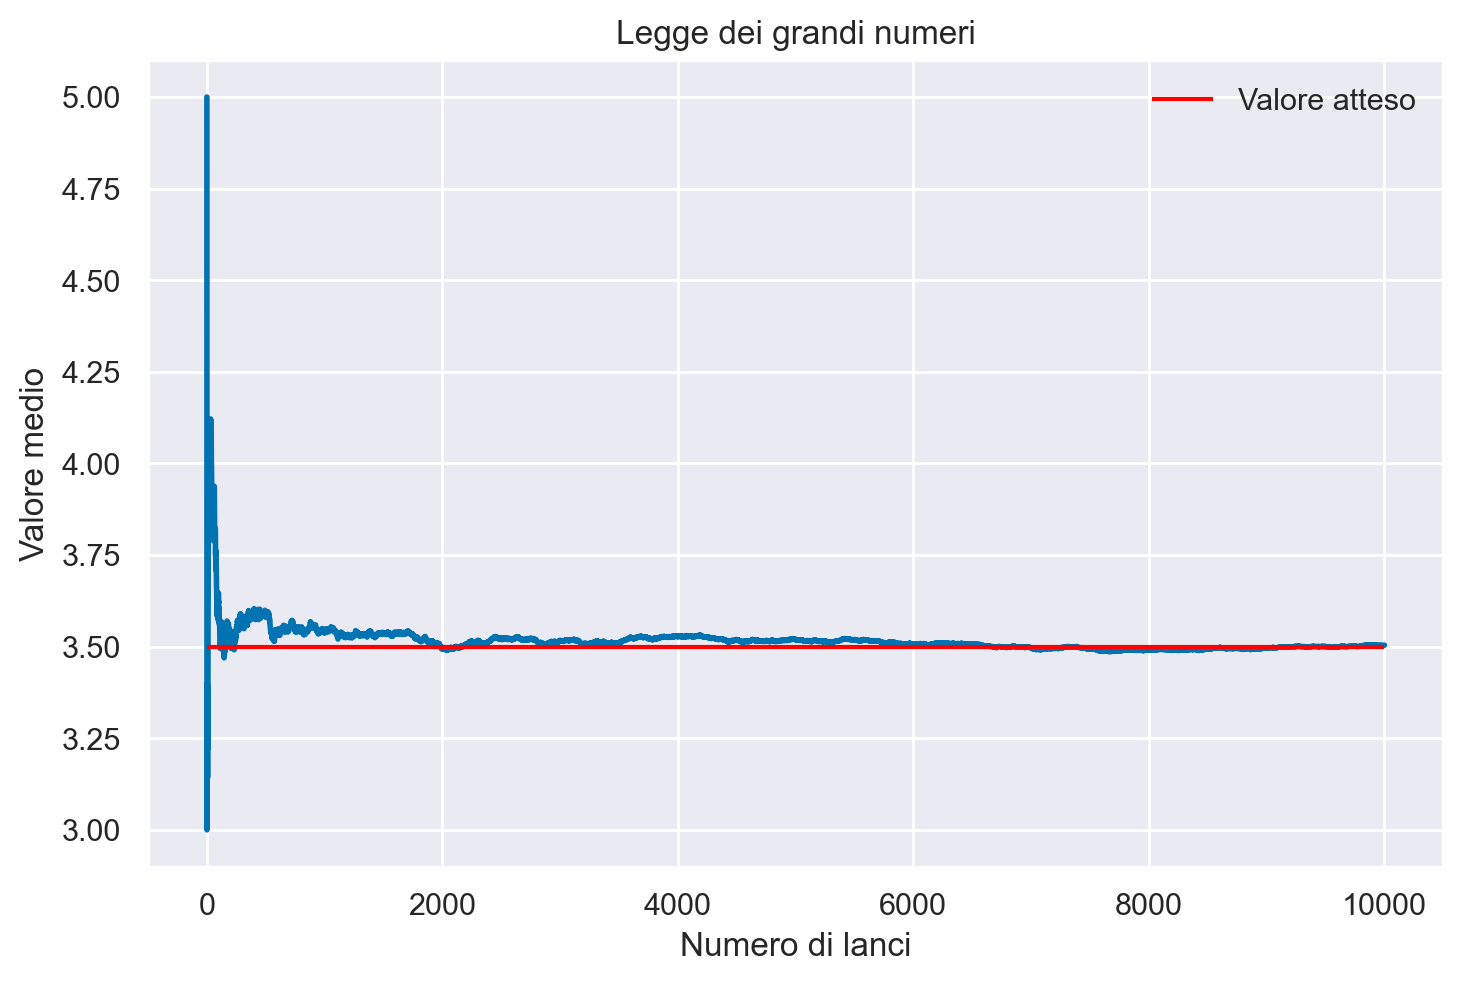

In [18]:
def simulate_dice_rolls(num_rolls):
    """Simulate dice rolls and return the average value for each roll."""
    total = 0
    averages = []
    for i in range(1, num_rolls + 1):
        roll = roll_die()
        total += roll
        averages.append(total / i)
    return averages


def plot_dice_rolls(averages, num_rolls):
    """
    Plot the average value after each dice roll.
    """
    x = range(1, num_rolls + 1)
    plt.plot(x, averages, linewidth=2)
    plt.hlines(y=3.5, xmin=0, xmax=num_rolls, color="red", label="Valore atteso")
    plt.xlabel("Numero di lanci")
    plt.ylabel("Valore medio")
    plt.title("Legge dei grandi numeri")
    plt.legend()
    plt.show()


if __name__ == "__main__":
    num_rolls = 10000
    averages = simulate_dice_rolls(num_rolls)
    plot_dice_rolls(averages, num_rolls)


## Commenti e considerazioni finali

In questo capitolo, abbiamo esplorato i fondamenti della teoria delle probabilità, tra cui la costruzione dello spazio campione per gli esperimenti casuali e le proprietà fondamentali della probabilità. Abbiamo imparato a calcolare le probabilità degli eventi in uno spazio campione discreto e utilizzato funzioni di ripartizione e di massa di probabilità per le variabili casuali. Inoltre, abbiamo introdotto il concetto di simulazione come metodo per approssimare le distribuzioni di probabilità empiriche quando non è possibile ottenere soluzioni analitiche.

La teoria delle probabilità è essenziale per la statistica e ha diverse applicazioni pratiche, tra cui la psicologia. Comprendere le probabilità ci consente di prendere decisioni informate in situazioni incerte e di sviluppare previsioni affidabili. Con una solida comprensione delle nozioni di base della probabilità, possiamo affrontare una vasta gamma di problemi e prendere decisioni basate sulla probabilità dei risultati possibili. Tuttavia, è fondamentale ricordare che i modelli probabilistici sono solo approssimazioni della realtà e possono essere influenzati da semplificazioni e limitazioni dei dati disponibili. Pertanto, è importante esercitare cautela nell'interpretazione dei risultati e comprendere le assunzioni alla base delle analisi.

## Esercizio

Utilizzando il file condiviso su Google Drive, ogni studente inserirà il proprio nome e la data di compleanno nel formato specificato. Successivamente, il file Excel con i dati verrà importato in Python. L'obiettivo del problema è confrontare la predizione teorica calcolata risolvendo il "paradosso del compleanno" con i dati effettivamente ottenuti dagli studenti. Questo problema ci permetterà di confrontare la teoria con i dati reali e di analizzare quanto sia probabile che ci siano studenti con compleanni uguali all'interno della classe. Di seguito, trovate un esempio di come contare il numero di compleanni uguali utilizzando il codice Python.

In [20]:
def count_same_birthdays(birthday_list):
    same_birthdays = {}
    for name, birthday in birthday_list:
        if birthday in same_birthdays:
            same_birthdays[birthday].append(name)
        else:
            same_birthdays[birthday] = [name]

    return same_birthdays


# Example input with 5 students
birthday_list = [
    ("Mario Rossi", "agosto 3"),
    ("Giovanna Bianchi", "agosto 3"),
    ("Maria Neri", "agosto 3"),
    ("Francesco Ferrari", "giugno 12"),
    ("Alice Esposito", "maggio 26"),
    ("Giovanna Romano", "giugno 12"),
    ("Maria Gallo", "agosto 3"),
]

same_birthdays = count_same_birthdays(birthday_list)

# Print shared birthdays
for birthday, students in same_birthdays.items():
    if len(students) > 1:
        print(f"Compleanno {birthday}: {', '.join(students)}")

Compleanno agosto 3: Mario Rossi, Giovanna Bianchi, Maria Neri, Maria Gallo
Compleanno giugno 12: Francesco Ferrari, Giovanna Romano


Altri esercizi sulla probabilità discreta sono proposti nell'appendice {ref}`discr-prob-appendix`.

## Watermark

In [19]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Mon Jan 22 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

pandas    : 2.1.4
arviz     : 0.17.0
scipy     : 1.11.4
seaborn   : 0.13.0
numpy     : 1.26.2
matplotlib: 3.8.2

Watermark: 2.4.3

